# Project 3
## EDA and Model Building

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
posts = pd.read_csv('../data/October_1-14.csv')

In [3]:
posts.fillna('', inplace=True)

In [4]:
posts['combined'] = posts['selftext'] + ' ' + posts['title']
posts['is_nfl'] = (posts['subreddit'] == 'nfl').map(int)

In [5]:
X = posts['combined']
y = posts['is_nfl']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2022)

Using CountVectorizer to process text data

In [7]:
cvec = CountVectorizer(stop_words='english', min_df=5)
cvec.fit(X_train)
X_train = cvec.transform(X_train)
X_test = cvec.transform(X_test)
X_cv = cvec.transform(X)

In [8]:
# for visualizations
df = pd.DataFrame(X_cv.todense(), columns=cvec.get_feature_names_out())

## EDA

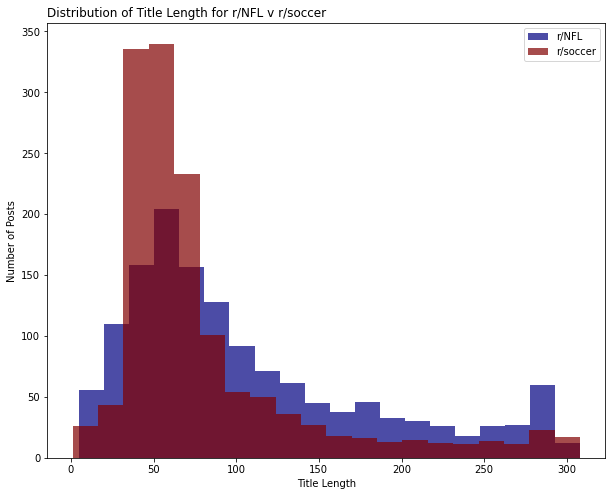

In [9]:
# distribution of word counts
posts['title_length'] = posts['title'].map(len)
plt.figure(figsize=(10, 8))
plt.hist(posts[posts['subreddit'] == 'nfl']['title_length'], color='navy', bins=20, alpha=0.7, label='r/NFL')
plt.hist(posts[posts['subreddit'] == 'soccer']['title_length'], color='maroon', bins=20, alpha=0.7, label='r/soccer')
plt.legend(loc='upper right')
plt.xlabel('Title Length')
plt.ylabel('Number of Posts')
plt.title('Distribution of Title Length for r/NFL v r/soccer', loc='left')
plt.savefig('../imgs/histograms.png', dpi=192, facecolor='white');

In [10]:
# The longest titles on r/NFL are links to tweets
posts[posts['subreddit'] == 'nfl'].sort_values('title_length', ascending=False).head()

,subreddit,selftext,title,combined,is_nfl,title_length
1442,nfl,,[Jackson] NFL and union say: The investigation...,[Jackson] NFL and union say: The investigatio...,1,308
1438,nfl,,[Barry Jackson] Tua investigation compete. NFL...,[Barry Jackson] Tua investigation compete. NF...,1,301
2679,nfl,,[ProFootballTalk] As one high-level source wit...,[ProFootballTalk] As one high-level source wi...,1,299
1434,nfl,,[Mike Garafolo] Conclusions of the joint NFL-N...,[Mike Garafolo] Conclusions of the joint NFL-...,1,296
1037,nfl,,[ESPN] Mike McDaniel: I'm actually the anti-T....,[ESPN] Mike McDaniel: I'm actually the anti-T...,1,296


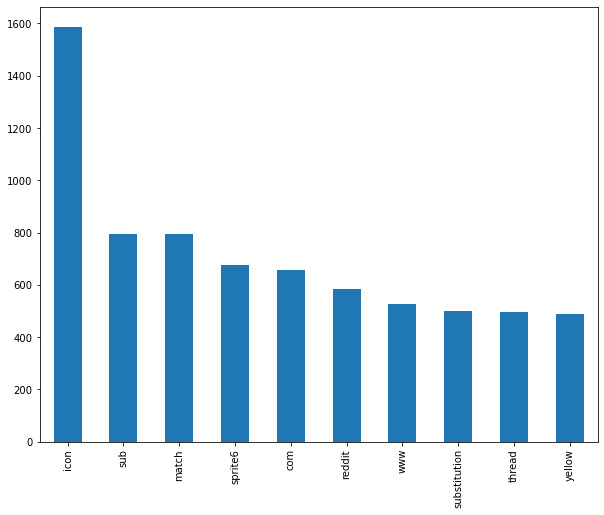

In [11]:
plt.figure(figsize=(10,8))
df.sum().sort_values(ascending=False).head(10).plot(kind='bar');

In [12]:
df['subreddit'] = posts['subreddit']

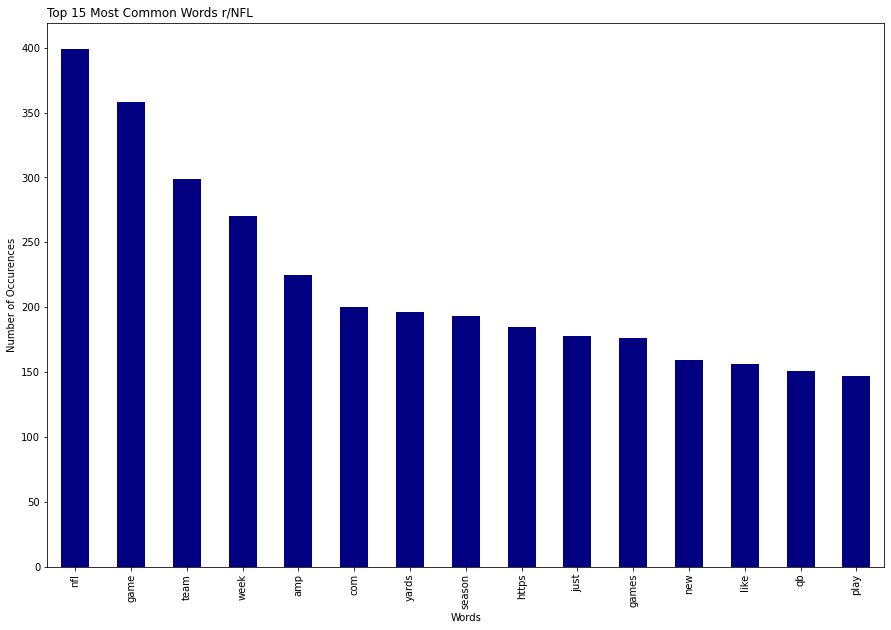

In [13]:
plt.figure(figsize=(15,10))
df[df['subreddit'] == 'nfl'].drop(columns='subreddit').sum().sort_values(ascending=False).head(15).plot(kind='bar', color='Navy')
plt.title('Top 15 Most Common Words r/NFL', loc='left')
plt.xlabel('Words')
plt.ylabel('Number of Occurences')
plt.savefig('../imgs/top15NFL.png', dpi=192, facecolor='white');

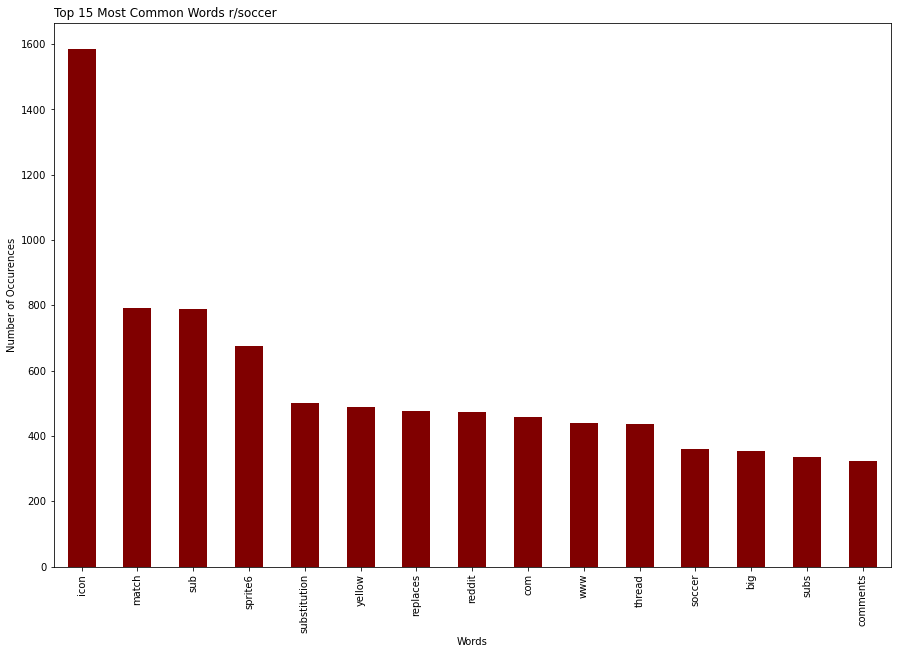

In [14]:
plt.figure(figsize=(15,10))
df[df['subreddit'] == 'soccer'].drop(columns='subreddit').sum().sort_values(ascending=False).head(15).plot(kind='bar', color='maroon')
plt.title('Top 15 Most Common Words r/soccer', loc='left')
plt.xlabel('Words')
plt.ylabel('Number of Occurences')
plt.savefig('../imgs/top15soccer.png', dpi=192, facecolor='white');

In [15]:
# looking for icon
posts[posts['combined'].str.lower().str.contains('icon')].head(10)

,subreddit,selftext,title,combined,is_nfl,title_length
111,soccer,# [](#sprite1-p64) **Werder Bremen** [0 - 0](#...,Match Thread: Werder Bremen vs. Borussia Mönch...,# [](#sprite1-p64) **Werder Bremen** [0 - 0](#...,0,69
114,soccer,#**54': WSG Swarovski Tirol [vs](#bar-3-white...,Match Thread: WSG Swarovski Tirol vs Rapid Vie...,#**54': WSG Swarovski Tirol [vs](#bar-3-white...,0,71
120,soccer,#**FT: SC Cambuur [3-0](#bar-3-white) PSV Ei...,Post Match Thread: SC Cambuur 3-0 PSV Eindhove...,#**FT: SC Cambuur [3-0](#bar-3-white) PSV Ei...,0,66
129,soccer,#**1': Sevilla [vs](#bar-3-white) Atletico M...,Match Thread: Sevilla vs Atletico Madrid | LaLiga,#**1': Sevilla [vs](#bar-3-white) Atletico M...,0,49
141,soccer,#**3': FC Groningen [vs](#bar-3-white) AZ Al...,Match Thread: FC Groningen vs AZ Alkmaar | Dut...,#**3': FC Groningen [vs](#bar-3-white) AZ Al...,0,59
142,soccer,#**20': West Ham United [vs](#bar-3-white) W...,Match Thread: West Ham United vs Wolverhampton...,#**20': West Ham United [vs](#bar-3-white) W...,0,81
159,soccer,#**54': Lillestrom [vs](#bar-3-white) Bodo/G...,Match Thread: Lillestrom vs Bodo/Glimt | Elite...,#**54': Lillestrom [vs](#bar-3-white) Bodo/G...,0,52
181,soccer,#**FT: Internazionale [1-2](#bar-3-white) AS...,Post Match Thread: Internazionale 1-2 AS Roma ...,#**FT: Internazionale [1-2](#bar-3-white) AS...,0,63
185,soccer,#**0': Ajax Amsterdam [vs](#bar-3-white) Go ...,Match Thread: Ajax Amsterdam vs Go Ahead Eagle...,#**0': Ajax Amsterdam [vs](#bar-3-white) Go ...,0,66
195,soccer,#**FT: Werder Bremen [5-1](#bar-3-white) Bor...,Post Match Thread: Werder Bremen 5-1 Borussia ...,#**FT: Werder Bremen [5-1](#bar-3-white) Bor...,0,81


In [16]:
posts[posts['combined'].str.lower().str.contains('sprite6')].head(10)

,subreddit,selftext,title,combined,is_nfl,title_length
111,soccer,# [](#sprite1-p64) **Werder Bremen** [0 - 0](#...,Match Thread: Werder Bremen vs. Borussia Mönch...,# [](#sprite1-p64) **Werder Bremen** [0 - 0](#...,0,69
196,soccer,# [](#sprite1-p64) **Werder Bremen** [5 - 1](#...,Post-Match Thread: Werder Bremen 5-1 Borussia ...,# [](#sprite1-p64) **Werder Bremen** [5 - 1](#...,0,74
588,soccer,# [](#sprite1-p87) **Leicester City** [4 - 0](...,Post-Match Thread: Leicester City 4-0 Nottingh...,# [](#sprite1-p87) **Leicester City** [4 - 0](...,0,72
699,soccer,# [](#sprite1-p8) **Bayern Munich** [0 - 0](#b...,Match Thread: Bayern Munich vs. Viktoria Plzeň...,# [](#sprite1-p8) **Bayern Munich** [0 - 0](#b...,0,70
743,soccer,# [](#sprite1-p3) **Liverpool** [0 - 0](#bar-3...,Match Thread: Liverpool vs. Rangers | UEFA Cha...,# [](#sprite1-p3) **Liverpool** [0 - 0](#bar-3...,0,59
901,soccer,# [](#sprite5-p14) **RB Leipzig** [0 - 0](#bar...,Match Thread: RB Leipzig vs. Celtic | UEFA Cha...,# [](#sprite5-p14) **RB Leipzig** [0 - 0](#bar...,0,59
1187,soccer,# [](#sprite1-p1) **Arsenal** [0 - 0](#bar-3-w...,Match Thread: Arsenal vs. Bodø/Glimt | UEFA Eu...,# [](#sprite1-p1) **Arsenal** [0 - 0](#bar-3-w...,0,57
1343,soccer,# [](#sprite2-p87) **Osasuna** [0 - 0](#bar-3-...,Match Thread: Osasuna vs. Valencia | LaLiga,# [](#sprite2-p87) **Osasuna** [0 - 0](#bar-3-...,0,43
1389,soccer,# [](#sprite2-p87) **Osasuna** [1 - 2](#bar-3-...,Post-Match Thread: Osasuna 1-2 Valencia | LaLiga,# [](#sprite2-p87) **Osasuna** [1 - 2](#bar-3-...,0,48
1557,soccer,# [](#sprite1-p13) **AC Milan** [2 - 0](#bar-3...,Post-Match Thread: AC Milan 2-0 Juventus | Ser...,# [](#sprite1-p13) **AC Milan** [2 - 0](#bar-3...,0,50


### Model 1
#### Random Forest

In [17]:
rf = RandomForestClassifier(random_state=2022, n_jobs=6)
pgrid_tree = {
    'n_estimators': [100, 150, 200],
    'max_depth': [2, 4, 6, 8, None]
}
gs_tree = GridSearchCV(rf, pgrid_tree, cv=5)
gs_tree.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_jobs=6, random_state=2022),
             param_grid={'max_depth': [2, 4, 6, 8, None],
                         'n_estimators': [100, 150, 200]})

In [18]:
gs_tree.best_params_

{'max_depth': None, 'n_estimators': 150}

In [19]:
gs_tree.score(X_train, y_train)

0.9957040572792363

In [20]:
gs_tree.score(X_test, y_test)

0.932761087267525

### Model 2
#### Support Vector Machine

In [21]:
svm = SVC(degree=2, random_state=2022)
pgrid = {'C': np.linspace(0.01, 100, 20)}

gs = GridSearchCV(svm, pgrid, cv=5)

In [22]:
gs.fit(X_train, y_train);

In [23]:
gs.best_params_

{'C': 15.797894736842105}

In [24]:
gs.score(X_train, y_train)

0.9828162291169451

In [25]:
gs.score(X_test, y_test)

0.9170243204577968